In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
df = pd.read_csv('socialmobility.csv')
df

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


There are 16 categories, we can start with uniform Dirichlet distribution over $\vec{p}$ with $\vec{\alpha} = (1, \cdots, 1)$.

$$Dirichlet(p_{1}, p_{2}, \cdots, p_{16}) | (1, 1, \cdots, 1)$$

Given that info, we know that the Dirichlet distribution is a conjugate prior for our Multinomial distribution. Therefore the posterior is also a Dirichlet distribution. 
The new alpha is given as $\vec{\alpha_{p\text{post}}} = \vec{\alpha_{\text{prior}}} + \vec{x}$

In [3]:
df['posterior'] = df['count'] + 1
df

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569
8,skilled,farm,63,64
9,skilled,unskilled,1453,1454


In [4]:
df.loc[df['father'] == 'unskilled']

,father,son,count,posterior
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569


The `unskilled_skilled` category with index 6 at position 2 represents the situation whereby the father was unskilled and their son was skilled. To calculate the 95% probability of this situaion we use `numpy`.

In [5]:
samples_1 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'unskilled']['posterior']), size=10000000)
samples_1

array([[0.01257628, 0.34617732, 0.32636097, 0.31488543],
       [0.0115657 , 0.35098697, 0.31691446, 0.32053287],
       [0.01123591, 0.34837674, 0.33631833, 0.30406902],
       ...,
       [0.01283464, 0.35471835, 0.32426928, 0.30817773],
       [0.01313398, 0.3430715 , 0.33678958, 0.30700493],
       [0.01038341, 0.34643143, 0.31688421, 0.32630095]])

Getting only the `farm` values whereby the father was a farmer. The index of when the child is `skilled` is 2. Therefore we would calculate the dirichlet of index 2.

In [6]:
percentiles = np.percentile(samples_1[:, 2], [0.025, 0.975])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.30241884 0.30982104]


Doing the same thing for a father that works on the farm and their son works as a professional `farm_professional` index 3

In [7]:
df.loc[df['father'] == 'farm']

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110


In [8]:
samples_2 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'farm']['posterior']), size=10000000)
samples_2

array([[0.15257537, 0.30900162, 0.30362261, 0.2348004 ],
       [0.15237576, 0.3219428 , 0.29054635, 0.23513509],
       [0.14386125, 0.32264299, 0.3121779 , 0.22131786],
       ...,
       [0.14969399, 0.3143084 , 0.30430196, 0.23169564],
       [0.14296968, 0.30928772, 0.30702702, 0.24071558],
       [0.14802222, 0.31514349, 0.30778469, 0.2290496 ]])

In [9]:
percentiles = np.percentile(samples_2[:, 3],  [0.025, 0.975])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.21395304 0.22073973]


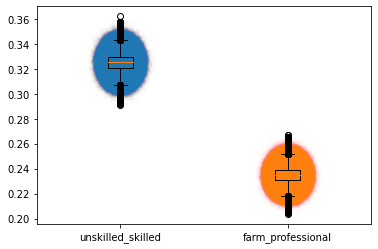

In [10]:
to_plot = []
samples = [samples_1[:, 2], samples_2[:, 3]]
for i in range(2):
    y = samples[i]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    to_plot.append(y)
    plt.plot(x, y, '.', alpha=0.002)
    
plt.boxplot(to_plot, positions=[0, 1], labels=['unskilled_skilled', 'farm_professional'])
plt.show()